# Import necessary libraries

In [5]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

# Load the data and display the first 10 rows

In [24]:
df = pd.read_csv(os.path.join(r"C:\Users\yvesm\Documents\My_Projects\Toxic_Comment_Classification\train.csv\train.csv"))

In [25]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


# Data Pre-processing

In [26]:
from tensorflow.keras.layers import TextVectorization

In [28]:
# Store the comments in a variable x
x = df["comment_text"]
x

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [29]:
# Exclude the first two columns "id" and "comment_text" and store the labels in a variable y
y = df[df.columns[2:]].values
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [32]:
# Set up the numbers of words we will have in our vocabulary
max_words = 200000

In [33]:
# initialize our text vectorization layer
vectorizer = TextVectorization(max_tokens = max_words,
                               output_sequence_length = 1800,
                               output_mode = "int")

In [34]:
# teach our vectorizer our vacabulary
vectorizer.adapt(x.values)

In [40]:
# Get the vocabulary
# vectorizer.get_vocabulary()

In [36]:
# check if our vectorizer works well
vectorizer("Hey, your work is awesome !")[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([ 425,   21,  141,    9, 3205], dtype=int64)>

In [38]:
# Now pass through all of our comments values stored in the x variable to our vectorizer and get every single word in a token
vectorized_text = vectorizer(x.values)
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [41]:
# create our dataset by applying subsequents data pre-processing pipeline steps like cache, shuffle, batch and prefetch
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y)) # with vectorized_text as input and labels y as output
dataset = dataset.cache() # cache the data
dataset = dataset.shuffle(160000) # how large the buffer size needs to be
dataset = dataset.batch(16) # each batch represented as a serie of 16 samples
dataset = dataset.prefetch(8) # helps to prevent bottlenecks

In [42]:
# grab the batched data out of the created dataset
batch_x, batch_y = dataset.as_numpy_iterator().next()

In [43]:
# batch x
batch_x

array([[166196,     26,      3, ...,      0,      0,      0],
       [  2920,     33,      8, ...,      0,      0,      0],
       [   312,      8,    253, ...,      0,      0,      0],
       ...,
       [    49,    234,     70, ...,      0,      0,      0],
       [     9,     12,    455, ...,      0,      0,      0],
       [  6022,    117,     13, ...,      0,      0,      0]], dtype=int64)

In [44]:
# batch y
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [45]:
# create training, validation and test partitions
train = dataset.take(int(len(dataset)*.7)) # just take 70% of the dataset for the training
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2)) # skip the first 70% and take 20% for the validation
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1)) # skip the first 90% and take the last 10% for the test set

# Sequential Model Creation

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [56]:
# create the sequential model
model = Sequential()

# create the embedding layer 
model.add(Embedding(max_words + 1, 32))

# bidirectional LSTM layer
model.add(Bidirectional(LSTM(32, activation = "tanh")))

# feature extractor Fully connected layers
model.add(Dense(128, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
# final layer 
model.add(Dense(6, activation = "sigmoid"))

In [57]:
# compile our neural network model
model.compile(loss = "BinaryCrossentropy", optimizer = "Adam")

In [58]:
# take a look at our model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                      

In [59]:
# train our deep neural network model using the model.fit() function
history = model.fit(train, epochs = 5, validation_data = val)

Epoch 1/5
6981/6981 [==============================] - 7820s 1s/step - loss: 0.0618 - val_loss: 0.0448
Epoch 2/5
6981/6981 [==============================] - 7843s 1s/step - loss: 0.0456 - val_loss: 0.0417
Epoch 3/5
6981/6981 [==============================] - 8043s 1s/step - loss: 0.0415 - val_loss: 0.0366
Epoch 4/5
6981/6981 [==============================] - 8288s 1s/step - loss: 0.0374 - val_loss: 0.0332
Epoch 5/5
6981/6981 [==============================] - 8501s 1s/step - loss: 0.0334 - val_loss: 0.0290


In [60]:
# check the loss metrics
history.history

{'loss': [0.06183011829853058,
  0.045618534088134766,
  0.0415416844189167,
  0.037444718182086945,
  0.0333997942507267],
 'val_loss': [0.04482579603791237,
  0.041736770421266556,
  0.03662993013858795,
  0.03315137326717377,
  0.029020970687270164]}

<Figure size 800x500 with 0 Axes>

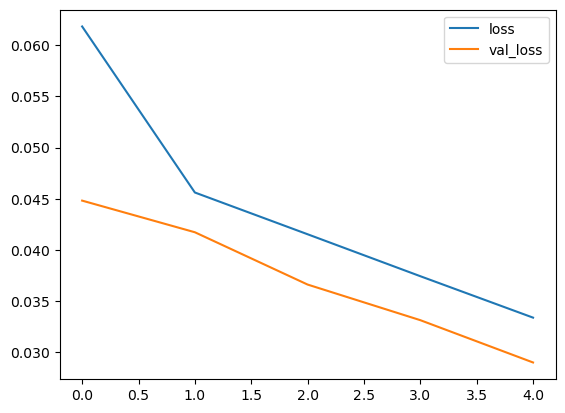

In [61]:
# plot the loss metrics
from matplotlib import pyplot as plt
import kaleido

plt.figure(figsize = (8, 5))
pd.DataFrame(history.history).plot()
plt.show("svg")

# Predictions

In [71]:
input_text = vectorizer("You sucks Man! Just delete your channel.")
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([  7, 743, 441, ...,   0,   0,   0], dtype=int64)>

In [72]:
pred = model.predict(np.array([input_text]))
pred

1/1 [==============================] - 0s 285ms/step


array([[0.9650695 , 0.0469931 , 0.8661001 , 0.00358648, 0.54180354,
        0.01210207]], dtype=float32)

In [73]:
# check our labels
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [74]:
# So we can say that this input_text comment is 96.6% toxic, 4.7% severe toxic, 86.6% obscene, etc.

In [78]:
# create the two batches x and y for the test data
batch_x, batch_y = test.as_numpy_iterator().next()

In [87]:
# try to make predictions on the batch x
(model.predict(batch_x) > 0.5).astype(int)

1/1 [==============================] - 0s 399ms/step


array([[1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

# Evaluation

In [89]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [90]:
# instantiate each one of the imported metrics
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [91]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    x_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(x_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 400ms/step


In [92]:
print(f"Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}")

Precision: 0.8923317790031433, Recall:0.7776868343353271, Accuracy:0.508525550365448


# Test and Gradio

In [93]:
!pip install gradio jinja2

     ---------------------------------------- 14.3/14.3 MB 6.1 MB/s eta 0:00:00
     -------------------------------------- 101.4/101.4 kB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.7/1.7 MB 6.9 MB/s eta 0:00:00
     -------------------------------------- 323.6/323.6 kB 6.8 MB/s eta 0:00:00
     ------------------------------------- 202.8/202.8 kB 12.8 MB/s eta 0:00:00
     ---------------------------------------- 45.7/45.7 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 813.6/813.6 kB 8.5 MB/s eta 0:00:00
     ---------------------------------------- 50.5/50.5 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 56.8/56.8 kB ? eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4693 sha256=2aab16eb48cd92b714d2887e8

In [94]:
import tensorflow as tf
import gradio as gr

In [95]:
model.save("toxicity.ok49")

INFO:tensorflow:Assets written to: toxicity.ok49\assets


INFO:tensorflow:Assets written to: toxicity.ok49\assets


In [96]:
model = tf.keras.models.load_model("toxicity.ok49")

In [97]:
input_str = vectorizer("I hate you!")

In [98]:
res = model.predict(np.array([input_str]))

1/1 [==============================] - 3s 3s/step


In [99]:
res

array([[0.569735  , 0.00337514, 0.07621048, 0.01348589, 0.16128233,
        0.0309967 ]], dtype=float32)

In [100]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ""
    for idx, col in enumerate(df.columns[2:]):
        text += "{}: {}\n".format(col, results[0][idx]>0.5)
    
    return text

In [104]:
interface = gr.Interface(fn = score_comment, 
                         inputs = gr.inputs.Textbox(lines = 2, placeholder = "Comment to score"), 
                         outputs = "text")

C:\Users\yvesm\anaconda3\lib\site-packages\gradio\inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\yvesm\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\yvesm\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [105]:
interface.launch(share = True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://9298d4c77b816cc234.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 283ms/step
